# Dual quantum bounds for a parametric Bell expression

## Tsirelson point Bell expression

We are considering the Bell expression

$$\beta_{r_0, r_1} = r_0 \left(\frac{A_0 + A_1}{\sqrt{2}} - B_0 \right) + r_1 \left(\frac{A_0 - A_1}{\sqrt{2}} - B_1 \right) + \frac{1}{2\sqrt{2}} \left((A_0 + A_1)B_0 + (A_0 - A_1)B_1 \right) $$

and we want to find a bound for the Bell expression for every choice of $(r_0, r_1)$.

We start by importing the following libraries

In [1]:
import numpy as np
import ncpol2sdpa as ncp
from ncpol2sdpa import *
import matplotlib.pyplot as plt

We define the settings and the operators

In [2]:
A_config = [2,2]
B_config = [2,2]

# Operators in problem
A = [Ai for Ai in ncp.generate_measurements(A_config, 'A')]
B = [Bj for Bj in ncp.generate_measurements(B_config, 'B')]

We define functions for adding extra monomials to the relaxation:

In [15]:
def get_subs():
    """
    Returns any substitution rules to use with ncpol2sdpa. E.g. projections and
    commutation relations.
    """
    subs = {}
    # Get Alice and Bob's projective measurement constraints
    subs.update(ncp.projective_measurement_constraints(A,B))

    return subs

We are now ready to perform the relaxation and get the Tsirelson bound! But first, we have to change notation. Since 

$$\hat{\Pi}_{a|x}^{(i=0)} = \hat{A}_{a|x}, \quad \hat{\Pi}_{b|y}^{(i=1)} = \hat{B}_{b|y},$$

we have

$$\hat{A}_x = 2 \hat{A}_{0|x} - 1, \qquad \hat{B}_y = 2 \hat{B}_{0|y} - 1.$$

In this notation, expanding, the Bell expression reads:

In [21]:
substitutions = get_subs()           # substitutions used in ncpol2sdpa
moment_ineqs = []                      # moment inequalities
moment_eqs = []                        # moment equalities
op_eqs = []                            # operator equalities
op_ineqs = []                          # operator inequalities
extra_monos = []    # extra monomials

# Bounds on the parameters of sys
ops = ncp.flatten([A,B])        # Base monomials involved in problem

r0 = -0.5
r1 = 0.5

s = np.sqrt(2)

obj = 1./s - s*A[0][0] - s*B[0][0] + s*A[0][0]*B[0][0] + s*A[1][0]*B[0][0] + s*A[0][0]*B[1][0] - s*A[1][0]*B[1][0] + r0 - s*r0 + s*A[0][0]*r0 + s*A[1][0]*r0 - 2*B[0][0]*r0 + r1 + s*A[0][0]*r1 - s*A[1][0]*r1 - 2*B[1][0]*r1

sdp = ncp.SdpRelaxation(ops, verbose = 0, normalized=True, parallel=0)
sdp.get_relaxation(level = 2,
                    equalities = op_eqs[:],
                    inequalities = op_ineqs[:],
                    momentequalities = moment_eqs[:],
                    momentinequalities = moment_ineqs[:],
                    objective = -obj,
                    substitutions = substitutions,
                    extramonomials = extra_monos)
sdp.solve('mosek')
print(-sdp.dual)

1.41421356296626


We could try to create a grid in the $(r_0, r_1)$ plane and determine the quantum bound for every pixel of the grid!

In [22]:
# Define a grid in the (r0, r1) plane
r0_vals = np.linspace(-0.5, 0.5, 100)  # Adjust resolution as needed
r1_vals = np.linspace(-0.5, 0.5, 100)

# Store results
quantum_bounds = np.zeros((len(r0_vals), len(r1_vals)))

# Loop over (r0, r1) values
for i, r0 in enumerate(r0_vals):
    for j, r1 in enumerate(r1_vals):

        obj = 1./s - s*A[0][0] - s*B[0][0] + s*A[0][0]*B[0][0] + s*A[1][0]*B[0][0] + s*A[0][0]*B[1][0] - s*A[1][0]*B[1][0] + r0 - s*r0 + s*A[0][0]*r0 + s*A[1][0]*r0 - 2*B[0][0]*r0 + r1 + s*A[0][0]*r1 - s*A[1][0]*r1 - 2*B[1][0]*r1


        sdp = ncp.SdpRelaxation(ops, verbose = 0, normalized=True, parallel=0)
        sdp.get_relaxation(level = 2,
                    equalities = op_eqs[:],
                    inequalities = op_ineqs[:],
                    momentequalities = moment_eqs[:],
                    momentinequalities = moment_ineqs[:],
                    objective = -obj,
                    substitutions = substitutions,
                    extramonomials = extra_monos)
        sdp.solve('mosek')

        # Store the quantum bound at this (r0, r1)
        quantum_bounds[i, j] = -sdp.dual

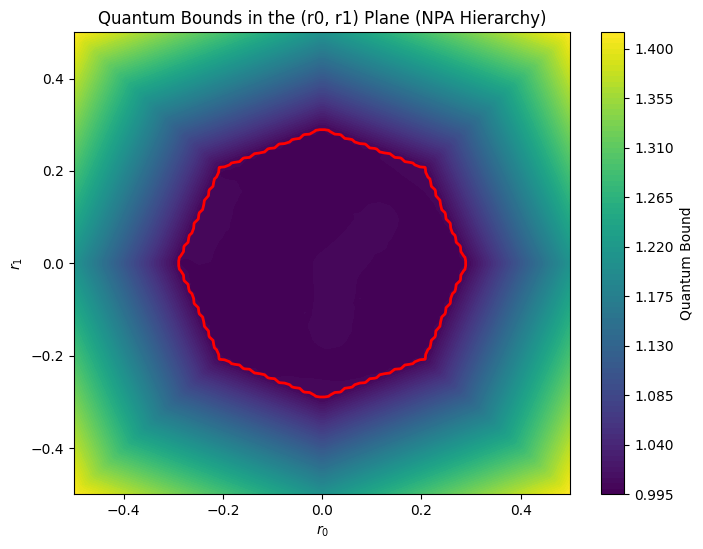

In [27]:
# Example plotting code with the additional contour line at quantum bound = 1
plt.figure(figsize=(8, 6))
contour = plt.contourf(r0_vals, r1_vals, quantum_bounds, levels=100, cmap="viridis")
plt.colorbar(label="Quantum Bound")

# Add a contour line for the quantum bound = 1
contour_line = plt.contour(r0_vals, r1_vals, quantum_bounds, levels=[1.001], colors='red', linewidths=2)
plt.clabel(contour_line, fmt="", inline=False, fontsize=10)

plt.xlabel("$r_0$")
plt.ylabel("$r_1$")
plt.title("Quantum Bounds in the (r0, r1) Plane (NPA Hierarchy)")
plt.show()

The NPA hierarchy conditions are asymptotically complete, but at this level they provide a necessary but not sufficient condition for the dual of the quantum set. But in this case, since at this level of the hierarchy, we have saturated the dual local bounds, which are contained in the dual quantum bounds, they provide a complete description of the dual quantum set for the Tsirelson point!

In [28]:
# Define a grid in the (r0, r1) plane
r0_vals = np.linspace(-0.5, 0.5, 100)  # Adjust resolution as needed
r1_vals = np.linspace(-0.5, 0.5, 100)

# Store results
quantum_bounds = np.zeros((len(r0_vals), len(r1_vals)))

# Loop over (r0, r1) values
for i, r0 in enumerate(r0_vals):
    for j, r1 in enumerate(r1_vals):

        obj = 1./s - s*A[0][0] - s*B[0][0] + s*A[0][0]*B[0][0] + s*A[1][0]*B[0][0] + s*A[0][0]*B[1][0] - s*A[1][0]*B[1][0] + r0 - s*r0 + s*A[0][0]*r0 + s*A[1][0]*r0 - 2*B[0][0]*r0 + r1 + s*A[0][0]*r1 - s*A[1][0]*r1 - 2*B[1][0]*r1


        sdp = ncp.SdpRelaxation(ops, verbose = 0, normalized=True, parallel=0)
        sdp.get_relaxation(level = 1,
                    equalities = op_eqs[:],
                    inequalities = op_ineqs[:],
                    momentequalities = moment_eqs[:],
                    momentinequalities = moment_ineqs[:],
                    objective = -obj,
                    substitutions = substitutions,
                    extramonomials = extra_monos)
        sdp.solve('mosek')

        # Store the quantum bound at this (r0, r1)
        quantum_bounds[i, j] = -sdp.dual

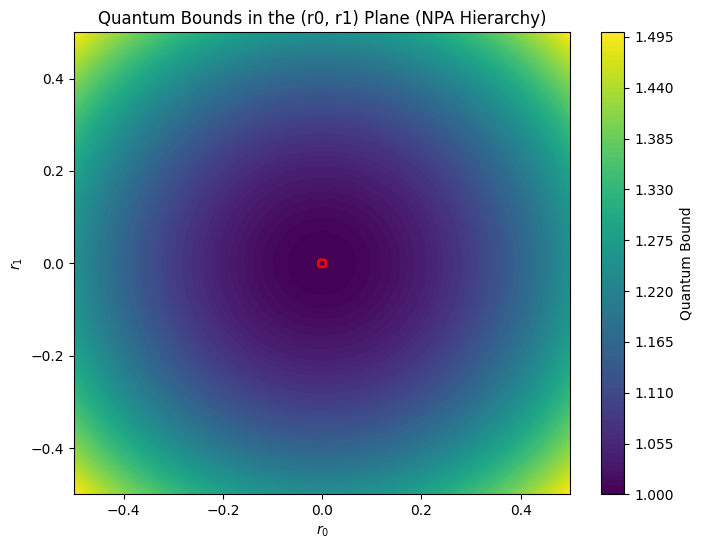

In [31]:
# Example plotting code with the additional contour line at quantum bound = 1
plt.figure(figsize=(8, 6))
contour = plt.contourf(r0_vals, r1_vals, quantum_bounds, levels=100, cmap="viridis")
plt.colorbar(label="Quantum Bound")

# Add a contour line for the quantum bound = 1
contour_line = plt.contour(r0_vals, r1_vals, quantum_bounds, levels=[1.0001], colors='red', linewidths=2)
plt.clabel(contour_line, fmt="", inline=False, fontsize=10)

plt.xlabel("$r_0$")
plt.ylabel("$r_1$")
plt.title("Quantum Bounds in the (r0, r1) Plane (NPA Hierarchy)")
plt.show()